# Twitter Sentiment Analysis

In [79]:
#Connect Google drive to colab
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


### About Dataset
Source : Kaggle

Context
The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.

Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, our objective is to predict the labels on the test dataset.

Content
Full tweet texts are provided with their labels for training data.
Mentioned users' username is replaced with @user.

### Main implemenatations 
1.Dataset source : Kagge ,
2.Problem statement : Sentiment analysis of a tweet review
3.preprocessing:Tokenization,padding
4.Batch normilization, dropouts,
5.adam activation and metrics used is accuarcy
6.Early stopping

In [80]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

import tensorflow as tf

### Loading dataset

In [81]:
df = pd.read_csv('/gdrive/My Drive/Colab Notebooks/RNN/RNN Variants/TheCodeWork/Twitter Sentiment Analysis/train.csv',header=0)
df_validation = pd.read_csv('/gdrive/My Drive/Colab Notebooks/RNN/RNN Variants/TheCodeWork/Twitter Sentiment Analysis/test.csv',header=0)

In [82]:
df_validation_original = df_validation.copy()

In [83]:
df.shape

(31962, 3)

In [84]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [85]:
df.isnull().sum() # Checking missing value if any

id       0
label    0
tweet    0
dtype: int64

No missing value observed.

In [86]:
df.loc[0, 'tweet']

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run'

In [87]:
y = df['label']
X = df.drop('label',axis =1)

### Checking data imbalance

In [88]:
round((len(y[y == 0])/len(y))*100,2) # % of label 0

92.99

In [89]:
round((len(y[y == 1])/len(y))*100,2) # % of label 1

7.01

Looking at % of both labels , data is highly imbalanced.Hence , We will do data augumenation to make the data balanced.

## 1.Class balancing with RandomOverSampler

In [90]:
from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')


# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)

Checking data imbalance post data balancing

In [91]:
round((len(y_over[y_over == 0])/len(y_over))*100,2) # % of label 0

50.0

In [92]:
round((len(y_over[y_over == 1])/len(y_over))*100,2) # % of label 1

50.0

Now, data is balanced.

### Splitting into train-test split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X_over,y_over,test_size = 0.3,random_state = 42)

In [94]:
X_train.shape

(41608, 2)

In [95]:
X_test.shape

(17832, 2)

### Build the Tokenizer

In [96]:
type(X_train)

pandas.core.frame.DataFrame

In [97]:
X_train[0:1] # Pputting all X_train data into list and taking 1st 

,id,tweet
29447,29448,so proud of this young man! can't believe i ha...


In [98]:
top_words = 10000 #Vocablury size
t = tf.keras.preprocessing.text.Tokenizer(num_words = top_words) # num_words -> Vocablury size

In [99]:
X_train = X_train['tweet'].squeeze() # converting into Dataframe into series

In [100]:
type(X_train)

pandas.core.series.Series

In [101]:
#Fit tokenizer with actual training data.Tokelization means identifying all indvisual unique words and creating a dictionary out of it.
t.fit_on_texts(X_train.tolist())

In [102]:
type(t)

keras_preprocessing.text.Tokenizer

In [103]:
#Vocabulary.Here index is assigned against each word of entire tweet
t.word_index

{'user': 1,
 'the': 2,
 'to': 3,
 'a': 4,
 'you': 5,
 'in': 6,
 'of': 7,
 'is': 8,
 'and': 9,
 'i': 10,
 'for': 11,
 'are': 12,
 'amp': 13,
 'on': 14,
 'this': 15,
 'be': 16,
 'my': 17,
 'â\x80¦': 18,
 'it': 19,
 'that': 20,
 'with': 21,
 'not': 22,
 'love': 23,
 'all': 24,
 'so': 25,
 'trump': 26,
 'have': 27,
 'like': 28,
 'your': 29,
 'we': 30,
 'me': 31,
 'if': 32,
 'at': 33,
 'day': 34,
 'do': 35,
 'what': 36,
 'but': 37,
 'just': 38,
 'by': 39,
 'will': 40,
 'about': 41,
 'as': 42,
 'from': 43,
 'white': 44,
 'people': 45,
 'no': 46,
 'when': 47,
 'libtard': 48,
 'was': 49,
 'black': 50,
 'new': 51,
 'how': 52,
 'happy': 53,
 'they': 54,
 'am': 55,
 "it's": 56,
 'why': 57,
 'u': 58,
 'up': 59,
 'his': 60,
 'who': 61,
 'out': 62,
 "i'm": 63,
 'can': 64,
 'he': 65,
 'has': 66,
 'racist': 67,
 "don't": 68,
 'time': 69,
 'one': 70,
 'more': 71,
 'get': 72,
 'good': 73,
 'politics': 74,
 'our': 75,
 'now': 76,
 'us': 77,
 '2': 78,
 'allahsoil': 79,
 'because': 80,
 'or': 81,
 'life': 

# Prepare Training and Test Data

In [104]:
X_train[0:1] # view first data after tokenization

29447    so proud of this young man! can't believe i ha...
Name: tweet, dtype: object

In [105]:
X_train = t.texts_to_sequences(X_train.tolist())

In [106]:
X_train[0:1][0] # checking first train tweet after tokenization

[25, 317, 7, 15, 539, 132, 84, 233, 10, 27, 1154, 1615, 435, 9723, 4687]

In [107]:
X_test = X_test['tweet'].squeeze() # converting into Dataframe into series

In [108]:
X_test = t.texts_to_sequences(X_test.tolist())  # coverting text to sequence of numbers

# Pad Sequences

In [109]:
#Define maximum number of words to consider in each review
max_review_length = 40

In [110]:
#Pad training and test reviews
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train,maxlen = max_review_length,padding = 'pre')
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test,maxlen = max_review_length,padding = 'pre')

In [111]:
len(X_train[0:1][0]) # printing lenght of first padded train tweet

40

In [112]:
X_train[0:1]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,   25,  317,    7,   15,  539,  132,   84,  233,
          10,   27, 1154, 1615,  435, 9723, 4687]], dtype=int32)

In [113]:
X_train.shape

(41608, 40)

In [114]:
X_test.shape

(17832, 40)

# Model building

In [115]:
#Initialize model
tf.keras.backend.clear_session()
model = tf.keras.Sequential()

In [116]:
model.add(tf.keras.layers.Embedding(top_words +1,60,input_length=max_review_length))  #Vocablury size = top_words,#Embedding size = 60,every word lengh is of 60 numbers. max_review_length = Number of words in each tweet


In [117]:
model.output

<KerasTensor: shape=(None, 40, 60) dtype=float32 (created by layer 'embedding')>

In [118]:
# Add LSTM layer with RNN state size of 256
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.50))


In [119]:
#model.add(tf.keras.layers.LSTM(256,dropout = 0.25))
model.add(tf.keras.layers.LSTM(256,dropout = 0.25)) #RNN State - size of cell state and hidden state is 256

In [120]:
model.output

<KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'lstm')>

In [121]:
#Adding Dense layer for output
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [122]:
#model compilation
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['accuracy'])

In [123]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 60)            600060    
                                                                 
 batch_normalization (BatchN  (None, 40, 60)           240       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 40, 60)            0         
                                                                 
 lstm (LSTM)                 (None, 256)               324608    
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 256)               0

In [124]:
#Executing graph
from tensorflow.keras.callbacks import EarlyStopping # This callback will stop the training when there is no improvement in the loss for three consecutive epochs.
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'loss',patience =5,mode = 'auto')


In [125]:
#model fit
history = model.fit(X_train,y_train,epochs =50,batch_size=64,validation_data=(X_test,y_test),callbacks = [early_stopping])

Epoch 1/50
651/651 [==============================] - 9s 10ms/step - loss: 0.2711 - accuracy: 0.8862 - val_loss: 0.0755 - val_accuracy: 0.9757
Epoch 2/50
651/651 [==============================] - 7s 11ms/step - loss: 0.0722 - accuracy: 0.9750 - val_loss: 0.5052 - val_accuracy: 0.8104
Epoch 3/50
651/651 [==============================] - 6s 9ms/step - loss: 0.0405 - accuracy: 0.9858 - val_loss: 0.0471 - val_accuracy: 0.9886
Epoch 4/50
651/651 [==============================] - 6s 9ms/step - loss: 0.0271 - accuracy: 0.9904 - val_loss: 0.0389 - val_accuracy: 0.9888
Epoch 5/50
651/651 [==============================] - 6s 9ms/step - loss: 0.0194 - accuracy: 0.9937 - val_loss: 0.0313 - val_accuracy: 0.9915
Epoch 6/50
651/651 [==============================] - 6s 9ms/step - loss: 0.0175 - accuracy: 0.9942 - val_loss: 0.0436 - val_accuracy: 0.9890
Epoch 7/50
651/651 [==============================] - 6s 9ms/step - loss: 0.0129 - accuracy: 0.9958 - val_loss: 0.0480 - val_accuracy: 0.9874
Epoc

### Observation
We observe that training stops at 38 epoch as losses started increasing post that.
Training accuracy : 99.85
Test accuracy : 98.99
Test Loss : 0.0583

In [126]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


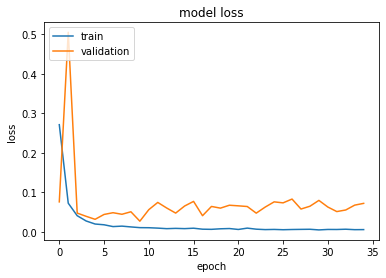

In [127]:
#Plotting model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Validation loss is almost trending same post ~ 30 epoch.

In [128]:
### Validation of model on separate given test data
type(df_validation)

pandas.core.frame.DataFrame

In [129]:
df_validation = pd.read_csv('/gdrive/My Drive/Colab Notebooks/RNN/RNN Variants/TheCodeWork/Twitter Sentiment Analysis/test.csv',header=0)

In [130]:

df_validation = df_validation['tweet'].squeeze() # converting into Dataframe into series

In [131]:
#Fit tokenizer with actual training data.Tokelization means identifying all indvisual unique words and creating a dictionary out of it.
t.fit_on_texts(df_validation.tolist())

In [132]:
type(t)

keras_preprocessing.text.Tokenizer

In [133]:
#Vocabulary.Here index is assigned against each word of entire tweet
t.word_index

{'user': 1,
 'the': 2,
 'to': 3,
 'a': 4,
 'you': 5,
 'i': 6,
 'and': 7,
 'in': 8,
 'of': 9,
 'is': 10,
 'for': 11,
 'my': 12,
 'are': 13,
 'on': 14,
 'this': 15,
 'be': 16,
 'amp': 17,
 'it': 18,
 'with': 19,
 'that': 20,
 'love': 21,
 'â\x80¦': 22,
 'all': 23,
 'so': 24,
 'not': 25,
 'me': 26,
 'day': 27,
 'your': 28,
 'have': 29,
 'we': 30,
 'at': 31,
 'like': 32,
 'just': 33,
 'do': 34,
 'trump': 35,
 'what': 36,
 'will': 37,
 'happy': 38,
 'if': 39,
 'but': 40,
 'am': 41,
 'from': 42,
 'by': 43,
 'when': 44,
 'about': 45,
 'as': 46,
 'new': 47,
 'people': 48,
 'was': 49,
 'no': 50,
 'u': 51,
 "it's": 52,
 'how': 53,
 'up': 54,
 'they': 55,
 "i'm": 56,
 'time': 57,
 'out': 58,
 'white': 59,
 'black': 60,
 'life': 61,
 'can': 62,
 'why': 63,
 'get': 64,
 'who': 65,
 'now': 66,
 'one': 67,
 'libtard': 68,
 'today': 69,
 'good': 70,
 'our': 71,
 'more': 72,
 'he': 73,
 "don't": 74,
 'his': 75,
 'has': 76,
 '2': 77,
 'positive': 78,
 "can't": 79,
 'or': 80,
 'thankful': 81,
 'see': 82,

In [134]:
df_validation = t.texts_to_sequences(df_validation.tolist())

df_validation[0:1][0] # checking first validation tweet after tokenization

[5023, 1856, 3, 200]

Pad Sequences

In [135]:
df_validation = tf.keras.preprocessing.sequence.pad_sequences(df_validation,maxlen = max_review_length,padding = 'pre')

In [136]:
len(df_validation[0:1][0]) # printing lenght of first padded validation tweet

40

In [137]:
df_validation[0:1] # Checking tensor of first validation data

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0, 5023, 1856,    3,  200]], dtype=int32)

In [138]:
#Get prediction for validation data


In [139]:
validationPredict = model.predict(df_validation)


In [140]:
type(validationPredict)

numpy.ndarray

In [141]:
validationPredict = pd.DataFrame(validationPredict)

In [142]:
# Appending y_test_df and y_pred_1
output = pd.concat([df_validation_original, validationPredict],axis=1)

In [143]:
type(output)

pandas.core.frame.DataFrame

In [144]:
output.head()

,id,tweet,0
0,31963,#studiolife #aislife #requires #passion #dedic...,0.001056
1,31964,@user #white #supremacists want everyone to s...,0.000009
2,31965,safe ways to heal your #acne!! #altwaystohe...,0.999986
3,31966,is the hp and the cursed child book up for res...,0.999999
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",0.000046


In [145]:
output.columns

Index(['id', 'tweet', 0], dtype='object')

In [146]:
output.rename(columns={'id': 'id', 'tweet': 'tweet',0:'Predicted_prob'}, inplace=True) #Renaming columns

In [147]:
output.head()

,id,tweet,Predicted_prob
0,31963,#studiolife #aislife #requires #passion #dedic...,0.001056
1,31964,@user #white #supremacists want everyone to s...,0.000009
2,31965,safe ways to heal your #acne!! #altwaystohe...,0.999986
3,31966,is the hp and the cursed child book up for res...,0.999999
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",0.000046


In [148]:
output['final_predicted'] = output['Predicted_prob'].map(lambda x: 1 if x > 0.5 else 0)

In [149]:
output.head()

,id,tweet,Predicted_prob,final_predicted
0,31963,#studiolife #aislife #requires #passion #dedic...,0.001056,0
1,31964,@user #white #supremacists want everyone to s...,0.000009,0
2,31965,safe ways to heal your #acne!! #altwaystohe...,0.999986,1
3,31966,is the hp and the cursed child book up for res...,0.999999,1
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",0.000046,0


In [150]:
df_validation = pd.read_csv('/gdrive/My Drive/Colab Notebooks/RNN/RNN Variants/TheCodeWork/Twitter Sentiment Analysis/test.csv',header=0)

In [151]:
output = output.to_excel('/gdrive/My Drive/Colab Notebooks/RNN/RNN Variants/TheCodeWork/Twitter Sentiment Analysis/output.xlsx')